In [1]:
import pandas as pd
import yaml
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
languages = pd.read_csv("languages.csv")

In [3]:
byte_size = languages.groupby(["language"])["size"].sum().reset_index(name = "size")
n_repos = languages.groupby(["language"])["size"].count().reset_index(name = "repos")
lang_props = byte_size.merge(
  n_repos,
  how = "left",
  on = "language"
)

In [4]:
total_byte_size = languages["size"].sum()
total_n_repos = len(languages["repo_name"].unique())

In [5]:
lang_props["size_prop"] = lang_props["size"] / total_byte_size
lang_props["repo_prop"] = lang_props["repos"] / total_n_repos

In [6]:
with open(f"language_colors.yaml", "r") as yaml_file:
  colors_yaml = yaml.safe_load(yaml_file)
colors = pd.DataFrame.from_dict({
  "language": colors_yaml.keys(),
  "color": colors_yaml.values()
})

In [7]:
lang_props = lang_props.merge(
  colors,
  how = "left",
  on = "language"
)

In [8]:
lang_props

,language,size,repos,size_prop,repo_prop,color
0,C,106475,1,0.009306,0.009434,#555555
1,C++,1868,2,0.000163,0.018868,#f34b7d
2,CSS,257399,34,0.022497,0.320755,#563d7c
3,Dockerfile,1131,2,0.000099,0.018868,#384d54
4,HTML,693985,22,0.060654,0.207547,#e34c26
5,INI,164327,4,0.014362,0.037736,#d1dbe0
6,JSON,83221,3,0.007273,0.028302,#292929
7,JavaScript,114916,11,0.010044,0.103774,#f1e05a
8,Jupyter Notebook,2818070,11,0.246298,0.103774,#da5b0b
9,MATLAB,20824,1,0.001820,0.009434,#e16737


In [9]:
#* Define plot size
plot_columns = 3
plot_rows = math.ceil(lang_props.shape[0] / plot_columns)

In [10]:
#* Build the x axis
x_axis = np.array([], dtype = int)
for i in range(1, plot_columns + 1):
  x_axis = np.append(
    x_axis,
    np.repeat(np.array([i]), plot_rows)
  )
x_axis = x_axis[0:lang_props.shape[0]]
x_axis

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3])

In [11]:
#* Build the y axis
y_axis = np.array([], dtype = int)
for i in range(1, plot_columns + 1):
  y_axis = np.append(
    y_axis,
    np.array(range(plot_rows, 0, -1))
  )
y_axis = y_axis[0:lang_props.shape[0]]
y_axis

array([8, 7, 6, 5, 4, 3, 2, 1, 8, 7, 6, 5, 4, 3, 2, 1, 8, 7, 6, 5, 4, 3,
       2, 1])

In [12]:
#* Sort data frame
lang_props = lang_props.sort_values(by = ["size_prop"], ascending = False).reset_index(drop = True)

In [13]:
lang_props["x_axis"] = x_axis
lang_props["y_axis"] = y_axis

In [15]:
lang_props

,language,size,repos,size_prop,repo_prop,color,x_axis,y_axis
0,Jupyter Notebook,2818070,11,0.246298,0.103774,#da5b0b,1,8
1,R,2491203,67,0.217730,0.632075,#198ce7,1,7
2,RMarkdown,2366938,54,0.206869,0.509434,#198ce7,1,6
3,SQL,753064,11,0.065817,0.103774,#e38c00,1,5
4,HTML,693985,22,0.060654,0.207547,#e34c26,1,4
5,Markdown,557897,106,0.048760,1.000000,#083fa1,1,3
6,Python,511899,22,0.044740,0.207547,#3572a5,1,2
7,CSS,257399,34,0.022497,0.320755,#563d7c,1,1
8,TeX,241136,9,0.021075,0.084906,#3d6117,2,8
9,INI,164327,4,0.014362,0.037736,#d1dbe0,2,7


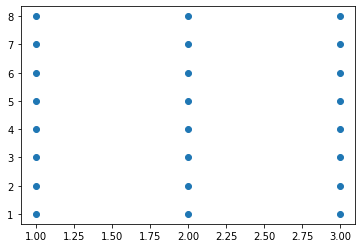

In [21]:
plt.plot(
  lang_props.x_axis,
  lang_props.y_axis,
  # color = lang_props["color"],
  marker = 'o',
  linewidth = 0
)